In [23]:
#https://www.python-course.eu/neural_network_mnist.php

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data_path = "C:\hafta_4"
train_data = np.loadtxt(data_path + "\mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "\mnist_test.csv", 
                       delimiter=",") 

In [26]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [27]:
train_data.ndim,train_data.shape     #785 her bir resmin boyutu=28*28+1

(2, (60000, 785))

In [28]:
train_data[10,0]   #10.satırın ilk elemanı

3.0

In [33]:
im_3=train_data[10,:]

In [34]:
im_3.shape

(785,)

In [36]:
im_4=im_3[1:]

In [37]:
im_4.shape

(784,)

In [38]:
im_5=im_4.reshape(28,28)

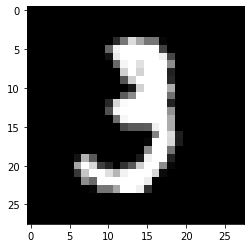

In [39]:
plt.imshow(im_5,cmap='gray')
plt.show()

In [40]:
#60000  veri 785 piksel var ; 1+28*28
m,n=train_data.shape

In [41]:

s=0
for i in range(m):
    if (train_data[i,0]==3):
        s=s+1
        
s #kaç tane 3 var

6131

In [42]:
def my_counter(k=0):
    s=0
    for i in range(m):
        if (train_data[i,0]==3):
            s=s+1
    return s
for i in range(10):
    c=my_counter(i)
    print(i," ",c)

0   6131
1   6131
2   6131
3   6131
4   6131
5   6131
6   6131
7   6131
8   6131
9   6131


In [43]:
m,n=train_data.shape
m,n

(60000, 785)

In [51]:
import math
def my_pdf_1(x,mu=0.0,sigma=1.0):
    x=float(x-mu)/sigma
    return math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi)/sigma

In [52]:
for i in range(m):
    digit_class=train_data[i,0]
    top_left=train_data[i,1]
    bottom_right=train_data[i,784]
    print(digit_class,end=" ")
    print(top_left,end=" ")
    print(bottom_right,end=" ")

5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 

0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 

 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0

0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 

0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 

3.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 

 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0

 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0

 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 7.0

5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 

6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 

 9.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 4.0

0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 

0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 

 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0

0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 

 0.0 0.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0

 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0

 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0

 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0

 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0

 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0

 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0

0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 

 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0

6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 0.0 

0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 

0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 

0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 

0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 

4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 

 3.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 5.0

 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0

 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0

0.0 3.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 

3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 

 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0

0.0 8.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 

 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 

 0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0

0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 

0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 

 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0

0.0 2.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 

0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 

0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 

 0.0 7.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0

 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0

 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0

0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 

9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 

0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 

 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0

1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 

0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 

In [53]:
s=0
k=0 #sınıf bilgisi
t=0
l=350 #locaationn     #500.pikseldeki ortalama değer
for i in range(m):
    if(train_data[i,0]==k):
        s=s+1
        t=t+train_data[i,l+1]
mean_1=t/s

s,t=0,0
for i in range(m):
    if(train_data[i,0]==k):
        s=s+1
        diff_1=train_data[i,l+1]-mean_1
        t=t+diff_1*diff_1
std_1=np.sqrt(t/(s-1))
print(mean_1,std_1)



22.705723450953908 61.8672005389669


In [57]:
def get_my_mean_and_std(k=0,l=0):
    s=0
    t=0
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            t=t+train_data[i,l+1]
    mean_1=t/s

    s,t=0,0
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            diff_1=train_data[i,l+1]-mean_1
            t=t+diff_1*diff_1
    std_1=np.sqrt(t/(s-1))
    #print(mean_1,std_1)
    return mean_1,std_1


In [63]:
m_1,std_1=get_my_mean_and_std(2,100)
my_pdf_1(test_value,m_1,std_1)

0.0046815945920497095

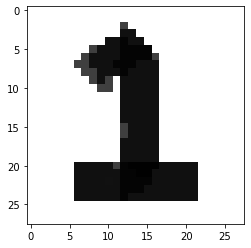

In [62]:
im_1=plt.imread('test_1.png')
plt.imshow(im_1)
plt.show()
test_value=im_1[0,0,0]